# Reading and Understanding the Data

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
bike = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check the shape of df

print(bike.shape)

(730, 16)


# DATA QUALITY CHECK


# Finding
##### There are no missing / Null values either in columns or rows

# Duplicate Check

In [11]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any

bike_dup.drop_duplicates(subset=None, inplace=True)

In [12]:
bike_dup.shape

(730, 16)

In [13]:
bike.shape

(730, 16)

# Data Cleaning
##### Checking value_counts() for entire dataframe.

In [14]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [15]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

# Insights
##### There seems to be no Unknown values in the entire dataset.

# Removing redundant & unwanted columns


##### -  I am removing instant,dteday and casual & registered

##### -  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

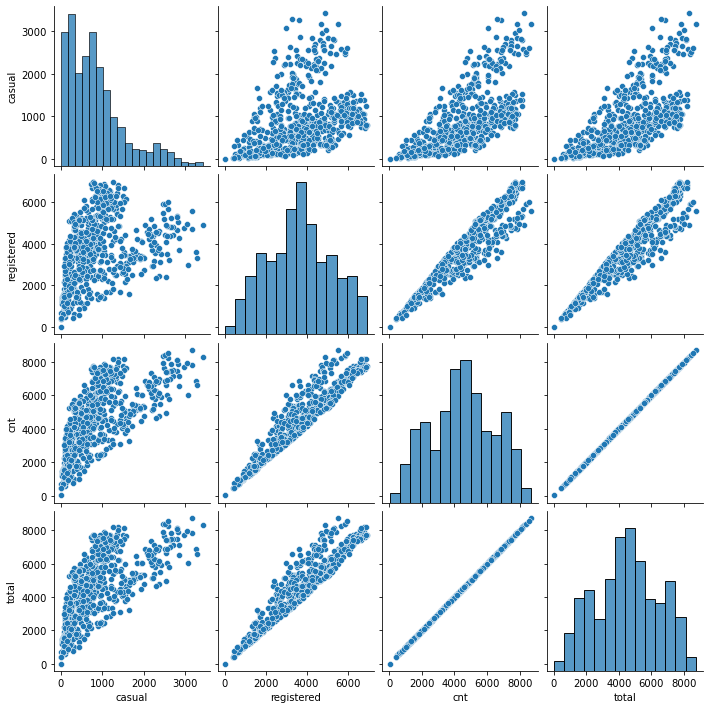

In [25]:
# Checking the relationship between casual, registered and cnt column

bike_cnt = bike[['casual','registered','cnt']]

# Creating a column whch will show the value of casual + registered

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

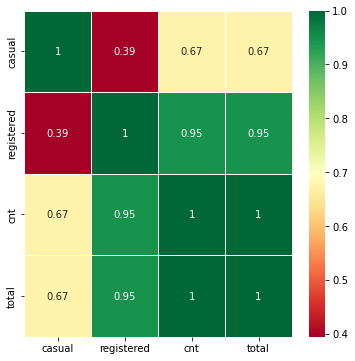

In [26]:
# also checking the correlation of the variables 

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [27]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

# Encoding and Visualizing the data

### Categorical columns

##### weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
##### season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter

In [28]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [29]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [104]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [105]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Saturday     0.143836
Sunday       0.143836
Monday       0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

# Categorical Variable Analysis

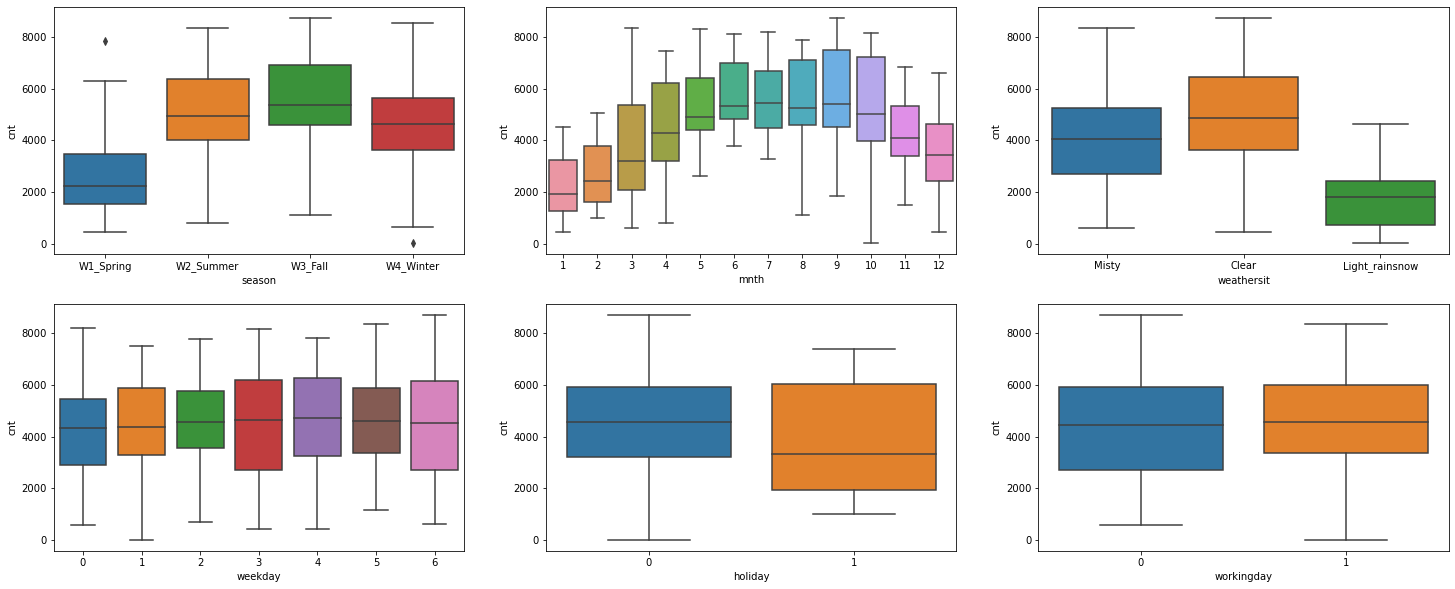

In [30]:
# Build boxplot of all categorical variables againt the target variable 'cnt'
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [31]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [32]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [33]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


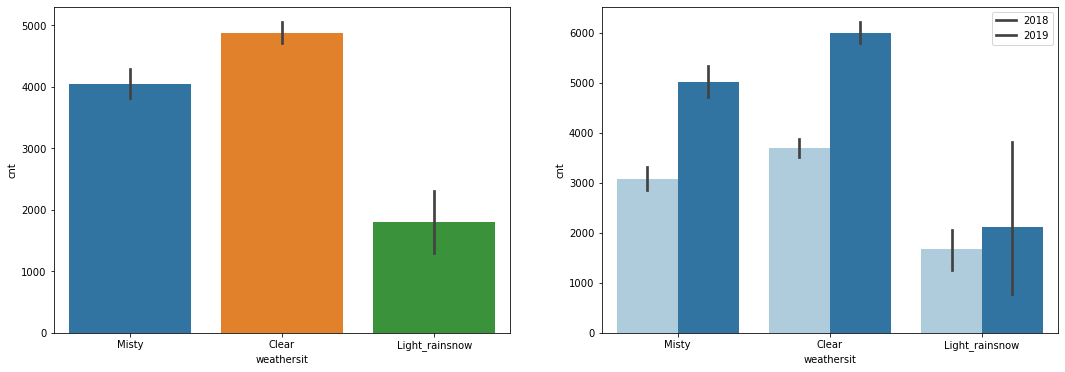

In [34]:
categorical_plot('weathersit',18,6)

In [106]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


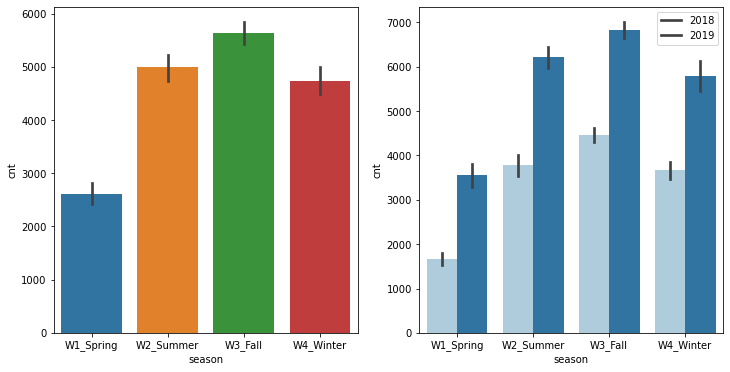

In [107]:
categorical_plot('season',12,6)

In [108]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


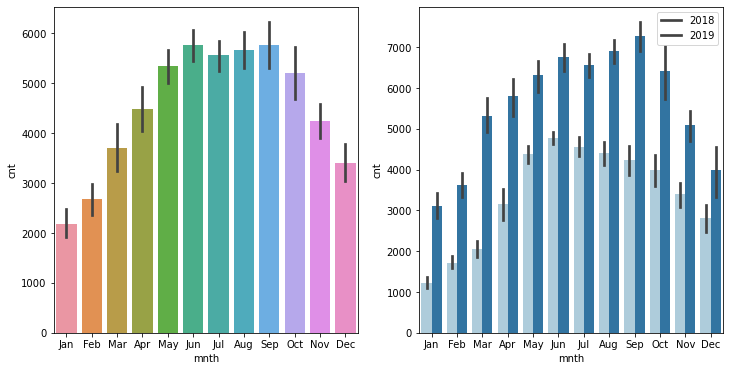

In [109]:
categorical_plot('mnth',12,6)

In [111]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


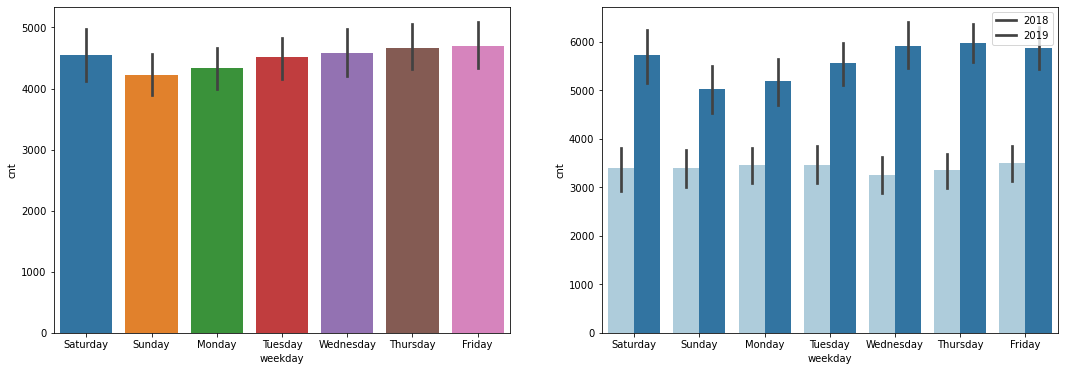

In [112]:
categorical_plot('weekday',18,6)

In [113]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


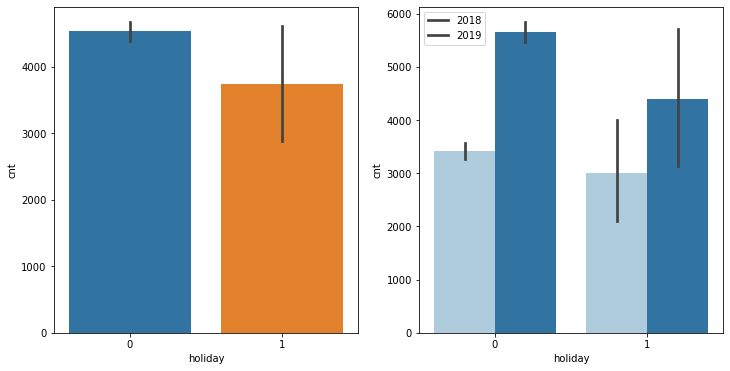

In [114]:
categorical_plot('holiday',12,6)

In [115]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


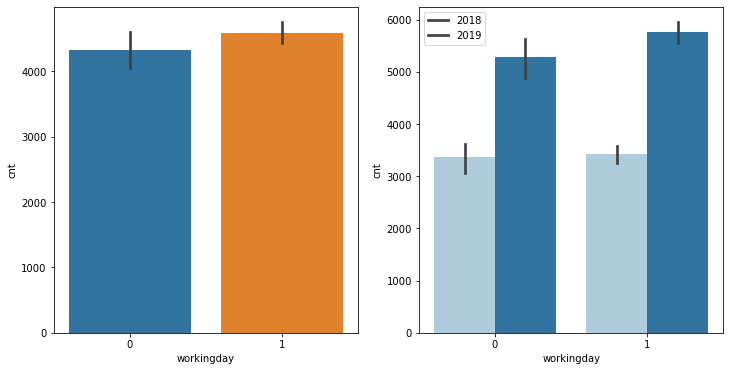

In [116]:
categorical_plot('workingday',12,6)

In [37]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


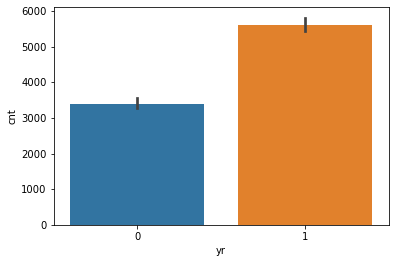

In [38]:
sns.barplot('yr','cnt',data=bike)
plt.show()

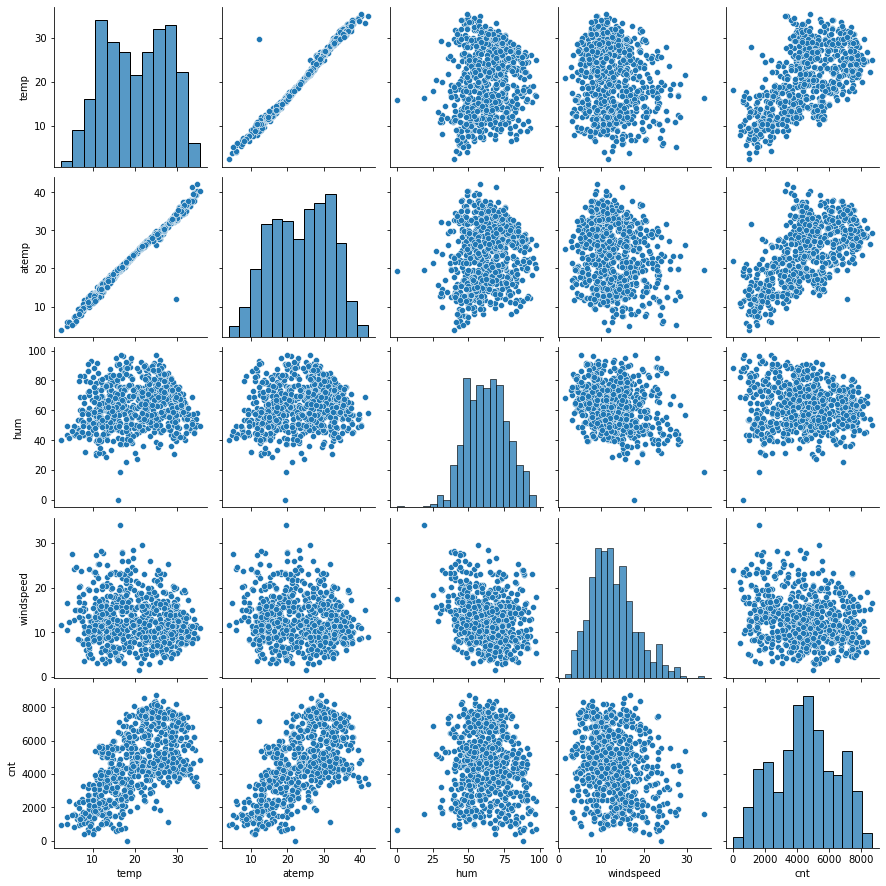

In [39]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

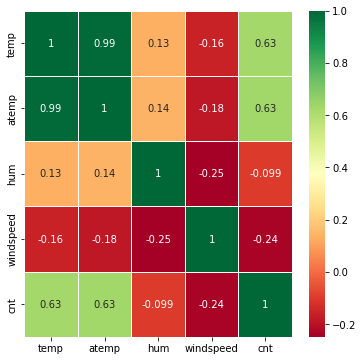

In [40]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)


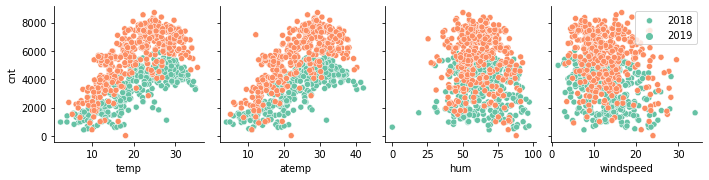

In [41]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

# Data Preparation

#### Dummy Variable Creation

#### Weather

In [117]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


#### Season

In [118]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


#### Month

In [119]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [120]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


### Merging the Dataframes

In [121]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [122]:
bike_new.shape

(730, 34)

In [123]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

### Removing unnecessary columns

In [124]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [125]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

# Splitting the data into Train & Test Dataset

#### Train & Test Split

In [126]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

##### Verifying the train - test split and new dataframe details

In [127]:
bike_train.shape

(510, 30)

In [128]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
bike_test.shape

(220, 30)

In [130]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Rescalling bike_train dataframe

In [131]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [132]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0


In [133]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [134]:
#Checking after rescalling
bike_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,1,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,...,0,0,0,0,0,0,0,0,0,0


# Checking Correlation Coefficient

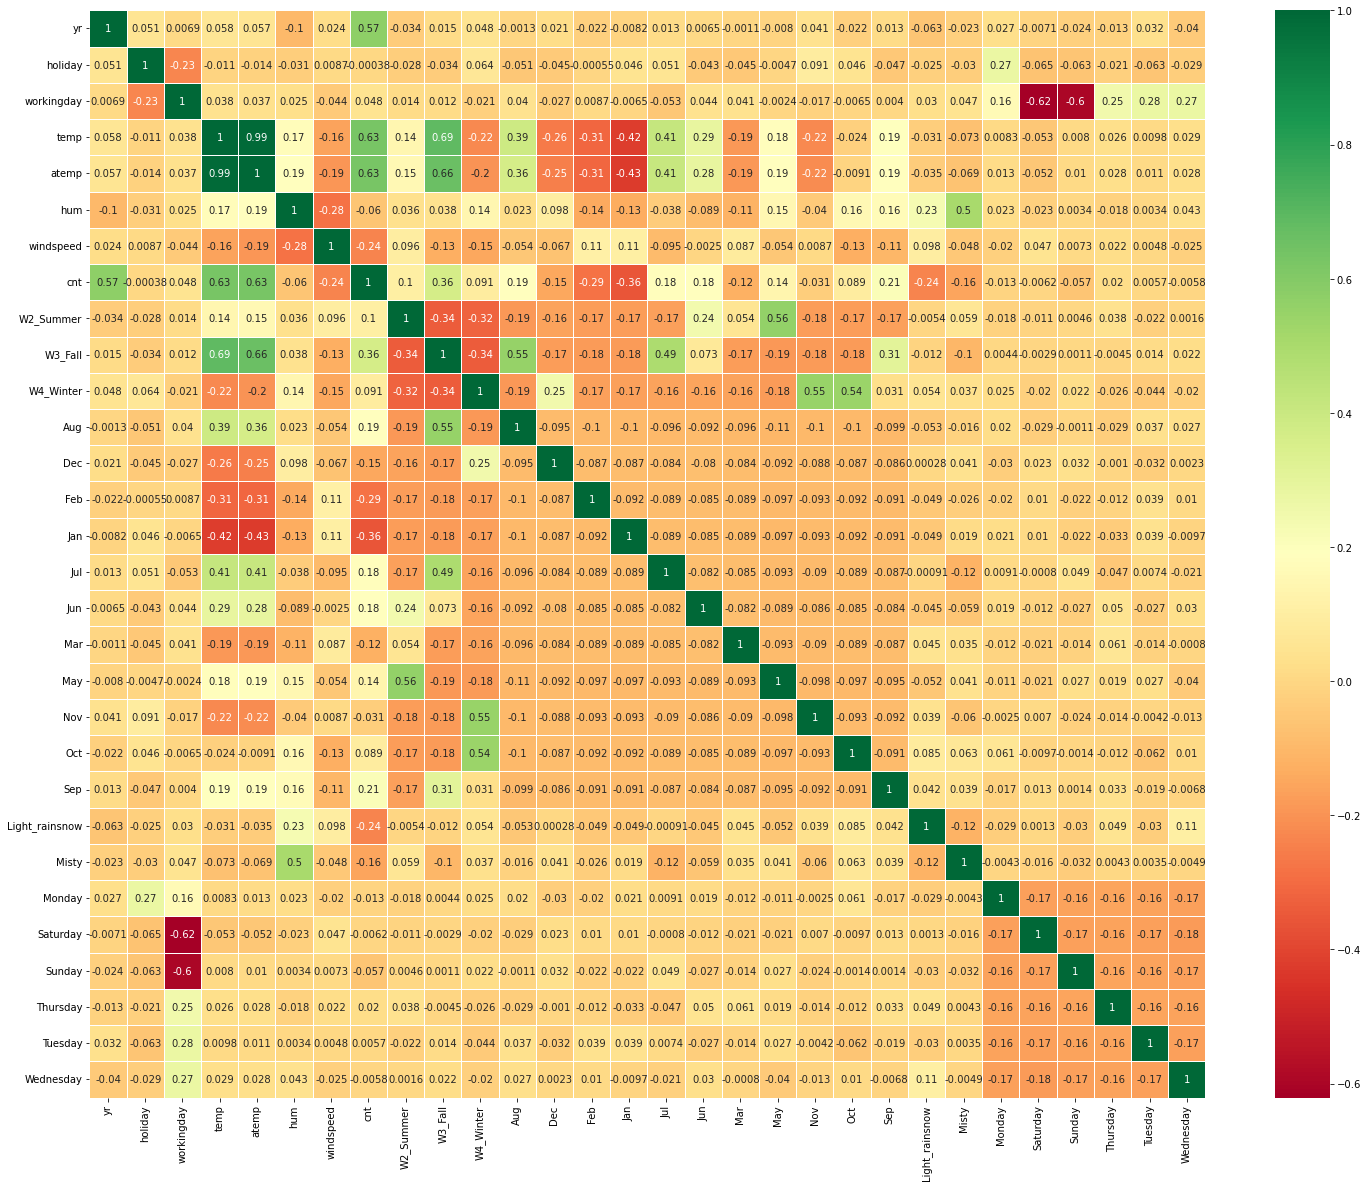

In [135]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

# Building the Linear Model

### Dividing into X_train and y_train

In [136]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# RFE

##### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [137]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [138]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 2),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 3),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 15)]

In [139]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday'],
      dtype='object')

In [140]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [141]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Manual Model Development using statsmodel

In [142]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

# Model 1

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.25
3,atemp,362.64
4,hum,17.60
7,W3_Fall,7.21
5,windspeed,4.75
1,workingday,4.66
8,W4_Winter,3.57
6,W2_Summer,3.51
13,Misty,2.16
0,yr,2.02


In [144]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.13e-185
Time:                        22:00:28   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

# Model 2

In [145]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,23.28
3,hum,17.31
6,W3_Fall,7.12
1,workingday,4.65
4,windspeed,4.59
7,W4_Winter,3.57
5,W2_Summer,3.51
12,Misty,2.15
0,yr,2.02
13,Saturday,1.80


In [146]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.13e-185
Time:                        22:00:30   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

# Model 3

In [147]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,16.95
5,W3_Fall,6.86
3,windspeed,4.31
1,workingday,4.14
4,W2_Summer,3.49
6,W4_Winter,3.49
0,yr,2.02
8,Nov,1.70
12,Saturday,1.66
11,Misty,1.55


In [148]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.33e-183
Time:                        22:00:32   Log-Likelihood:                 495.68
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0881      0.020      4.

# Model 4

In [149]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.85
3,windspeed,4.17
1,workingday,4.10
0,yr,2.01
5,W4_Winter,1.99
11,Saturday,1.66
7,Nov,1.63
4,W2_Summer,1.56
10,Misty,1.55
8,Sep,1.21


In [150]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.16e-180
Time:                        22:00:34   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     497   BIC:                            -893.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0733      0.020      3.

# Model 5

In [151]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
10,Saturday,1.66
4,W2_Summer,1.56
9,Misty,1.53
5,W4_Winter,1.41
7,Sep,1.20
6,Mar,1.15


In [152]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.51e-181
Time:                        22:01:17   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0726      0.020      3.

# Model 6

In [153]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [154]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.48e-181
Time:                        22:02:09   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0828      0.020      4.

In [155]:
# Checking the parameters obtained
lr6.params

const             0.082768
yr                0.230252
workingday        0.043963
temp              0.564438
windspeed        -0.154241
W2_Summer         0.082300
W4_Winter         0.129186
Sep               0.094832
Light_rainsnow   -0.307082
Misty            -0.074921
Saturday          0.057838
dtype: float64

# Linear Relationship

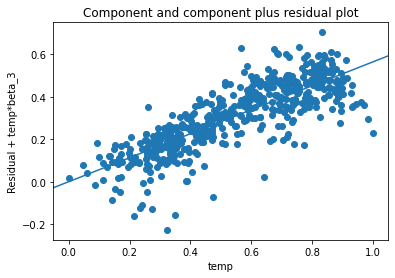

In [156]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

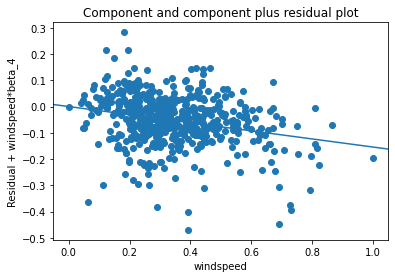

In [157]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

### Homoscedasticity

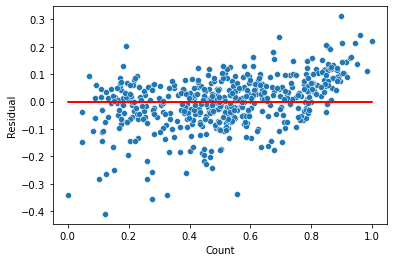

In [160]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Absence of Multicolinearity

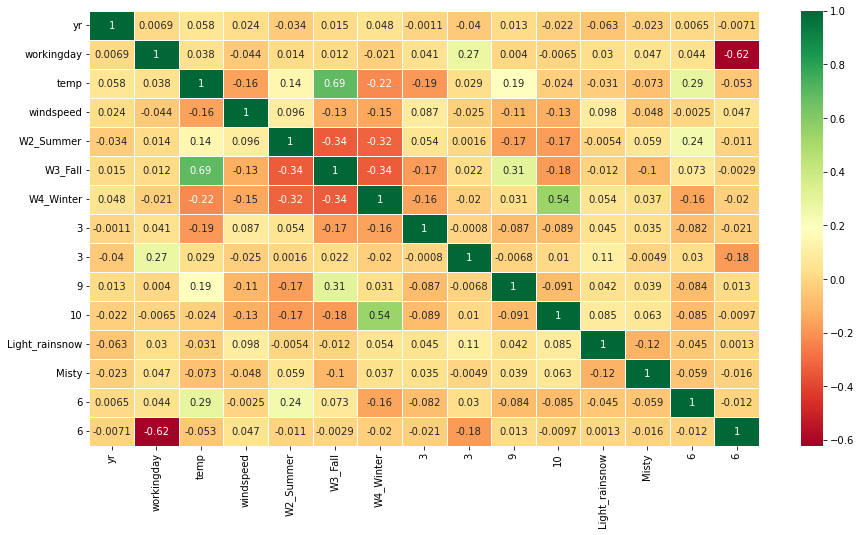

In [89]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [90]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,temp,17.50
5,W3_Fall,6.76
1,workingday,4.40
3,windspeed,4.30
4,W2_Summer,3.49
6,W4_Winter,2.90
0,yr,2.03
10,10,1.66
14,6,1.66
12,Misty,1.55


###  Independence of residuals

##### 0 – 2: positive auto-correlation
##### 2 – 4: negative auto-correlation)

In [163]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0296


# Normality of error

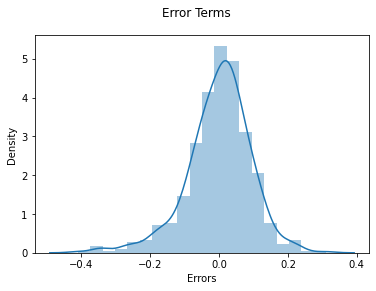

In [161]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

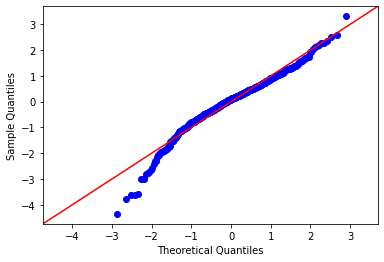

In [164]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

# Making Predictions using final model

### Scaling bike_test dataframe

In [165]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,0,1,0


In [166]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X_test and y_test

In [167]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [168]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   W2_Summer       220 non-null    uint8  
 6   W4_Winter       220 non-null    uint8  
 7   Sep             220 non-null    uint8  
 8   Light_rainsnow  220 non-null    uint8  
 9   Misty           220 non-null    uint8  
 10  Saturday        220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [169]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# Model Evaluation

Text(0, 0.5, 'y_pred')

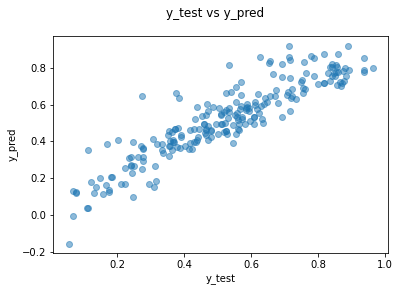

In [170]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

### R2 Value Calculation for bike_test dataframe

In [171]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8206

### Adjusted R2 Value Calculation for bike_test dataframe

In [172]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.812

### Calculating RMSE for the selected Model

In [173]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0929

### Calculating Mean Absolute Error for the selected Model

In [174]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0714